* Considere que hay una poblacion de individuos (A) en donde el 70% dicen la verdad. Si no tenemos otra informacion que la anterior, la probabilidad de que un individuo seleccionado al azar diga la verdad es igual a 0,7. Esta probabilidad se conoce con el nombre de probabilidad a priori.
* Considere ahora que cuando un individuo dice una mentira su pulso cardiaco se acelera y la densidad de probabilidad de la variable aleatoria que mide las pulsaciones tiene una distribucion exponencial con parametro beta = 0,01. Por otro lado la distribucion cuando dicen la verdad es tambien exponencial pero con parametro alpha = 0.1

1. Obtenga los histogramas de las pulsaciones cardiacas para los individuos de la poblacion (A) que dicen la verdad y que mienten.
2. Cual es la probabilidad de que un individuo seleccionado al azar diga la verdad cuando tiene XX pulsaciones cardiacas? Esta probabilidad se conoce como probabilidad a posteriori.
3. El conocer las pulsasiones en que porcentaje mejora la probabilidad de detectar que un individuo miente o dice la verdad?

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

nbins = 20000
nbHypothesis = 20000
alpha = 0.1
beta = 0.01
pLie = 0.3
pTruth = 1 - pLie

np.random.seed(1234)
# Hypothesis source: TRUE (1) FALSE (0)

def getHypothesis(pTruth, pLie, nb):
    p = [pTruth, pLie]
    out = np.random.choice(2, nb, p)
    return out

# Output of brain cell activity instrument

def getBrainActivity(hypothesis, alpha, beta):
    out = [np.random.exponential(1/alpha) 
           if hypothesis[i] == 1 else np.random.exponential(1/beta)
           for i in range(len(hypothesis))]
    return out
           
# Lier Detector

def detect(input, alpha, beta, pTruth, pLie):
    theta = 1/(beta - alpha) * np.log((pLie * beta) / (pTruth * alpha))
    outHypothesis = [1 if input[i] > theta else 0 for i in range (len(input))]
    return [theta, outHypothesis]

def simuladorPe(alpha, beta, pTruth, nb):
    hypothesis = getHypothesis(pTruth, nb)
    observation = getBrainActivity(hypothesis, alpha, beta)
    [theta, hypDetected] = detect(observation, alpha, beta, pTruth)
    error = [1 if hypothesis[i] != hypDetected[i] else 0 for i in range(nb)]
    return (np.sum(error)/nb)

hypothesis = getHypothesis(pTruth, pLie, nbHypothesis)

observation = getBrainActivity(hypothesis, alpha, beta)

theta, hypDetected = detect(observation, alpha, beta, pTruth, pLie)

error = [1 if hypothesis[i] != hypDetected[i] else 0 for i in range(nbHypothesis)]

nbHypothesis = 1000
print(np.sum(error)/nbHypothesis)
print(len(hypothesis))

16.765
20000


<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

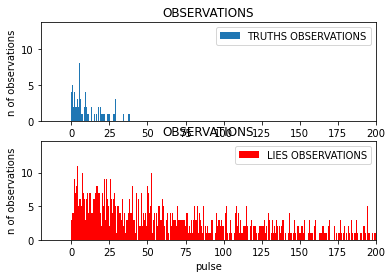

In [5]:
import matplotlib.pyplot as plt

def filterObservation(observations, hypothesis):
    truths = []
    lies = []

    for i in range(len(observations)):
        if hypothesis[i]:
            truths.append(observations[i])
        else:
            lies.append(observations[i])

    return [lies, truths]

[lieObservations, truthObservations] = filterObservation(observation, hypothesis)

plt.subplot(2, 1, 1)
plt.title("OBSERVATIONS")
histTruth = plt.hist(truthObservations, nbins)
plt.xlabel("pulse")
plt.ylabel("n of observations")
plt.xlim((-20, 200))
plt.legend(["TRUTHS OBSERVATIONS"])
plt.grid

plt.subplot(2, 1, 2)
plt.title("OBSERVATIONS")
histTruth = plt.hist(lieObservations, nbins, color='red')
plt.xlabel("pulse")
plt.ylabel("n of observations")
plt.xlim((-20, 200))
plt.legend(["LIES OBSERVATIONS"])
plt.grid
